In [70]:
import snap
import sys, os
import itertools
import networkx as nx
from matplotlib import pyplot as plt
import tqdm
sys.path.append('../')

In [77]:
class MotifCounter(object):
    def __init__(self, num_nodes, subgraph_path = "../data/subgraphs"):
        self.motif_counts = {2:2, 3:13, 4:500}
        self.subgraph_path = os.path.join(subgraph_path, str(num_nodes))
        self.num_nodes = num_nodes
        
        #if len(os.listdir(self.subgraph_path)) == 0:        
        self.create_motifs()
        #self.motifs = [snap.LoadEdgeList(snap.PNGraph, os.path.join(self.subgraph_path,"{}.txt".format(i)), 0, 1) for i in range(self.motif_counts[num_nodes])]
        
        
    def match(self, G1, G2):
        if G1.GetEdges() > G2.GetEdges():
            return False
        else:
            G = snap.ConvertGraph(snap.PNGraph, G2, True)
            H = snap.ConvertGraph(snap.PNGraph, G1, True)
            
        for p in itertools.permutations(range(self.num_nodes)):
            edge = G.BegEI()
            matches = True
            while edge < G.EndEI():
                if not H.IsEdge(p[edge.GetSrcNId()], p[edge.GetDstNId()]):
                    matches = False
                    break
                edge.Next()
            if matches:
                break
        return matches
    
    def create_motifs(self):
        #print("hello")
        graph_list = []
        num_found = 0
        for graph in tqdm.tqdm(self.enumerate_graphs(self.num_nodes), total=2**(self.num_nodes*(self.num_nodes-1))):            
            if num_found==0:
                graph_list.append(graph)
                self.draw_graph(graph, os.path.join(self.subgraph_path, str(num_found)+'.png') )
                num_found += 1
            else:
                for generated_subgraph in graph_list:
                    isomorphic = self.match(graph, generated_subgraph)
                    if isomorphic:
                        break
                if not isomorphic:
                    self.draw_graph(graph, os.path.join(self.subgraph_path, str(num_found)+'.png') )
                    graph_list.append(graph)
                    num_found+=1
        print(len(graph_list))
    
    def enumerate_graphs(self, k):
        for seq in itertools.product("01", repeat=k*(k-1)):
            g = snap.TNGraph.New()
            for i in range(k): g.AddNode(i)
            for i,e in enumerate(seq):
                if e=='1':
                    start_node = i/(k-1)
                    end_node = i % (k-1)
                    if end_node >= start_node:
                        end_node += 1
                    g.AddEdge(start_node, end_node)
            if snap.GetMxWcc(g).GetNodes()==k:
                yield g 
            
    def draw_graph(self, g, outname):
        plt.clf()
        G = nx.DiGraph()
        for n in g.Nodes():
            G.add_node(n.GetId())
        for e in g.Edges():
            G.add_edge(e.GetSrcNId(), e.GetDstNId())
        nx.draw(G)
        plt.savefig(outname)
        
            


  0%|          | 414/1048576 [00:19<23:28:07, 12.41it/s]

KeyboardInterrupt: 

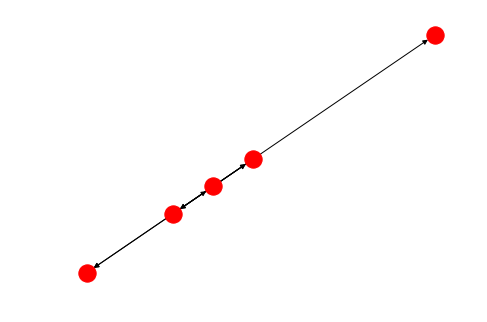


  0%|          | 414/1048576 [00:36<23:28:07, 12.41it/s]

In [78]:
mc = MotifCounter(5)